In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

In [2]:
data_info = pd.read_csv(r'C:\Users\Luis\lending_club_info.csv',index_col='LoanStatNew')
# import data columns description.

In [3]:
print(data_info.loc['revol_util']['Description'])
# 'revol_util' information description.

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [4]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [5]:
feat_info('mort_acc')

Number of mortgage accounts.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df = pd.read_csv(r'C:\Users\Luis\lending_club_data.csv')
# import data.

In [8]:
df.info()
df.head()
# ~400000 entries; 27 columns; some missing information.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


<Axes: xlabel='loan_status', ylabel='count'>

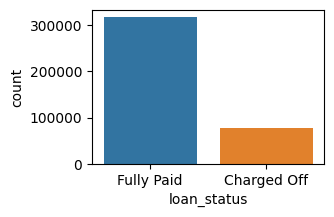

In [9]:
plt.figure(figsize=(3,2))
sns.countplot(x='loan_status',data=df)
# comparison fully paid X charged off

C:\Users\Luis\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


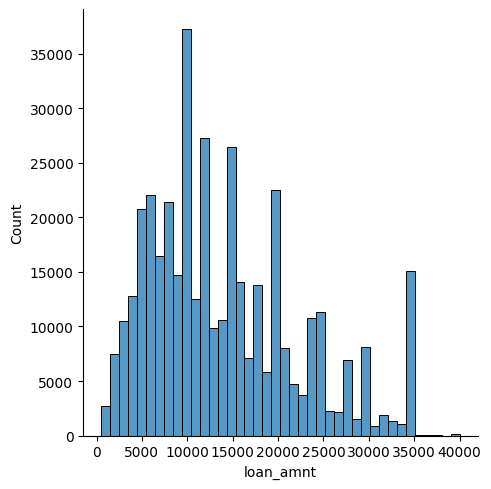

In [10]:
sns.displot(df['loan_amnt'],kde=False,bins=40)
# loan amount count distribution.

In [11]:
df_corr = df
for column in df_corr.columns:
    if df_corr[column].dtype == object:
        df_corr = df_corr.drop(column, axis=1)
        
# create a auxiliar df_corr to remove string columns and apply correlation function.       

df_corr.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


(12.0, 0.0)

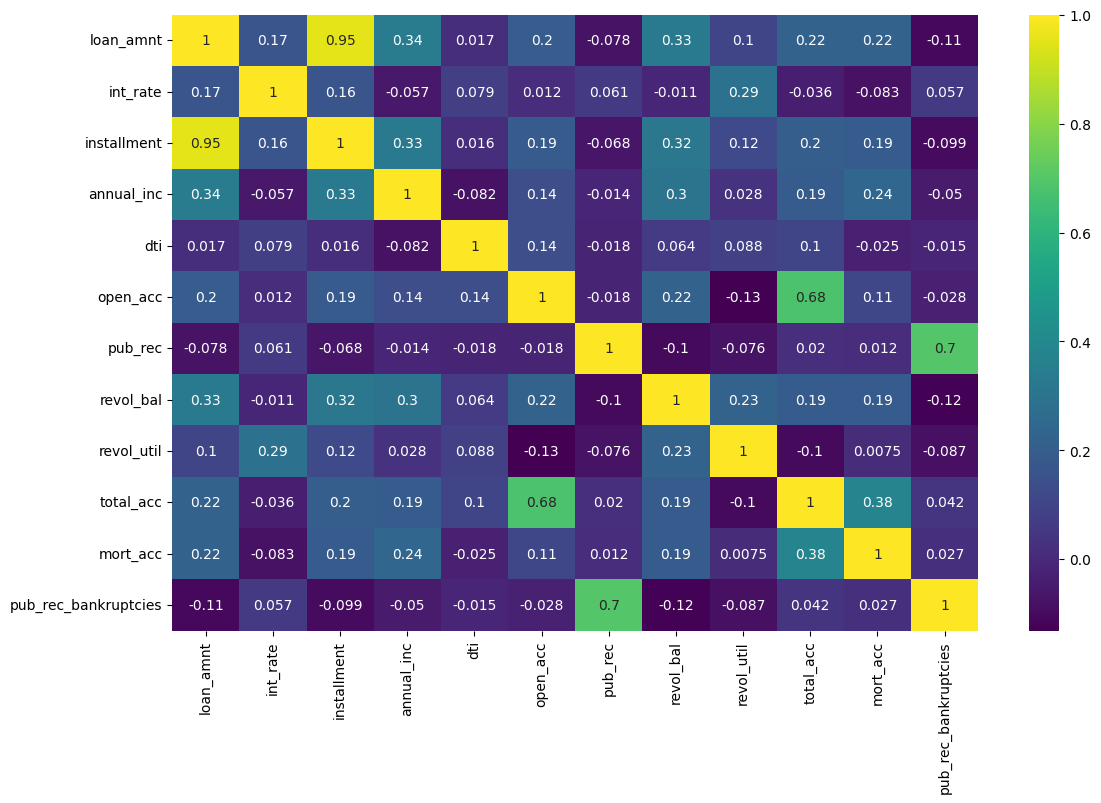

In [12]:
plt.figure(figsize=(13,8))
sns.heatmap(df_corr.corr(),annot=True,cmap='viridis')
plt.ylim(12, 0)
# heat correlation map.

In [13]:
feat_info('installment')
# 'installment' has almost perfect correlation to 'loan_amount'

The monthly payment owed by the borrower if the loan originates.


In [14]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<Axes: xlabel='installment', ylabel='loan_amnt'>

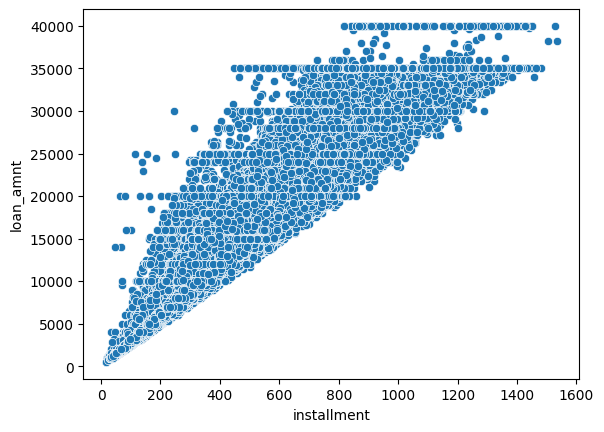

In [15]:
sns.scatterplot(x='installment',y='loan_amnt',data=df,)
# correlation between these two columns.

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

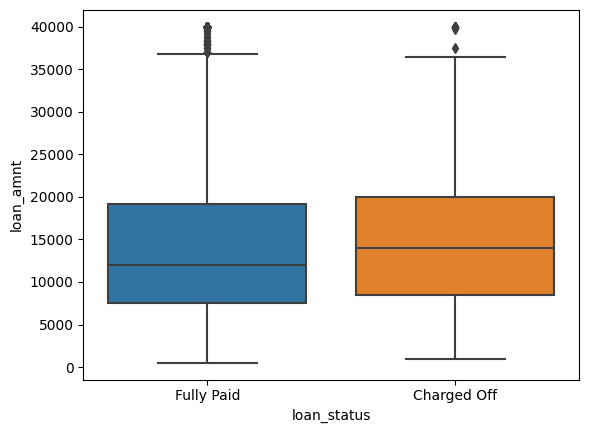

In [16]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)
# compare values.

In [17]:
df.groupby('loan_status')['loan_amnt'].mean()
# very close mean values between this two columns.

loan_status
Charged Off    15126.300967
Fully Paid     13866.878771
Name: loan_amnt, dtype: float64

<Axes: xlabel='grade', ylabel='count'>

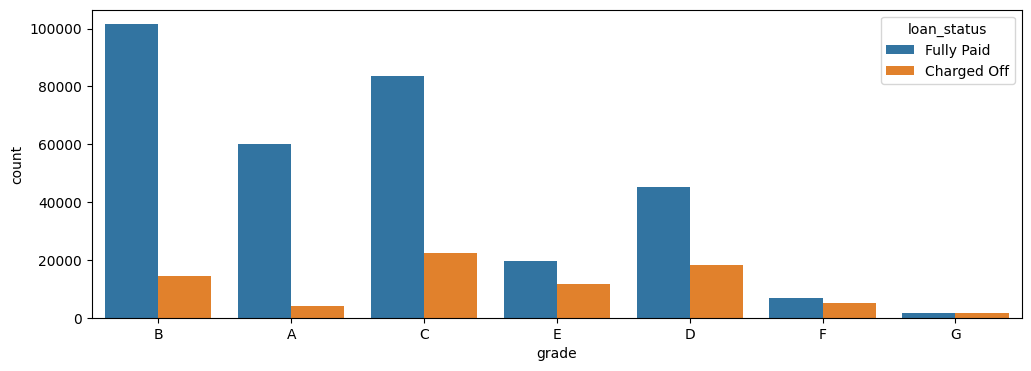

In [18]:
plt.figure(figsize=(12,4))
sns.countplot(x='grade',data=df,hue='loan_status')
# grade x status
# better grades tend to have less charged off events.

<Axes: xlabel='sub_grade', ylabel='count'>

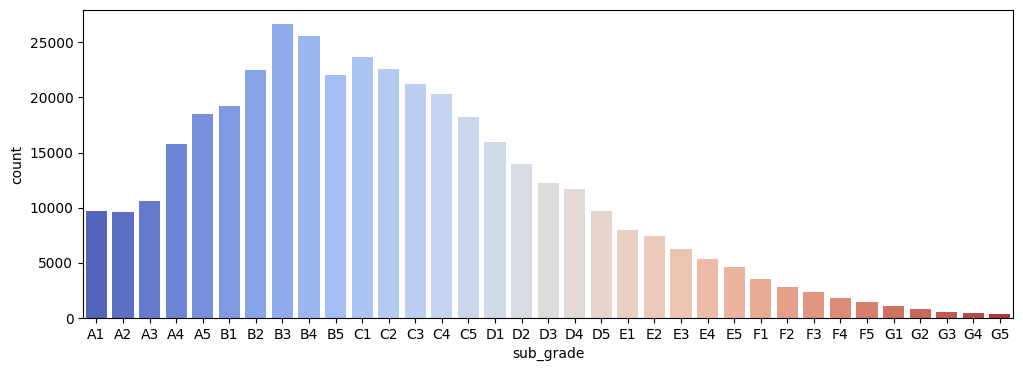

In [19]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm')
# count by sub grade.

<Axes: xlabel='sub_grade', ylabel='count'>

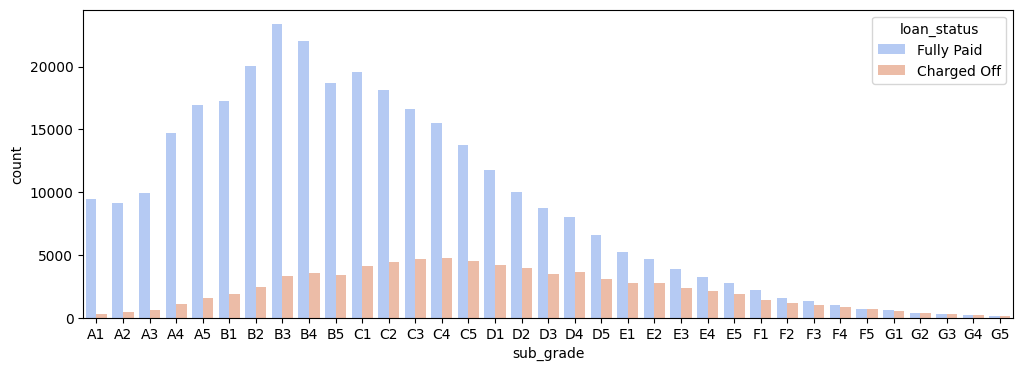

In [20]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm' ,hue='loan_status')

In [22]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [23]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})
# converting 'loan_status' to binary variable.

In [24]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


**TASK: Create a Series that displays the total count of missing values per column.**

In [25]:
df.isnull().sum()
# sum of missing values on df.

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**TASK: Convert this Series to be in term of percentage of the total DataFrame**

In [26]:
100* df.isnull().sum()/len(df)
# missing values on %.

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [27]:
feat_info('emp_title')
print('\n')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [28]:
df['emp_title'].nunique()

173105

In [29]:
df['emp_title'].value_counts()
# Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.

emp_title
Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: count, Length: 173105, dtype: int64

In [30]:
df = df.drop('emp_title',axis=1)

In [31]:
sorted(df['emp_length'].dropna().unique())
# unique values on 'emp_length'.

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [32]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']
# correct values ordering.

<Axes: xlabel='emp_length', ylabel='count'>

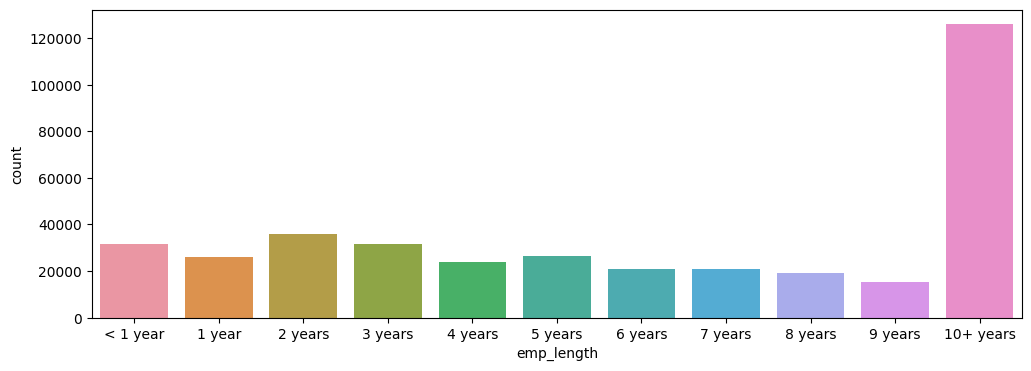

In [33]:
plt.figure(figsize=(12,4))

sns.countplot(x='emp_length',data=df,order=emp_length_order)

<Axes: xlabel='emp_length', ylabel='count'>

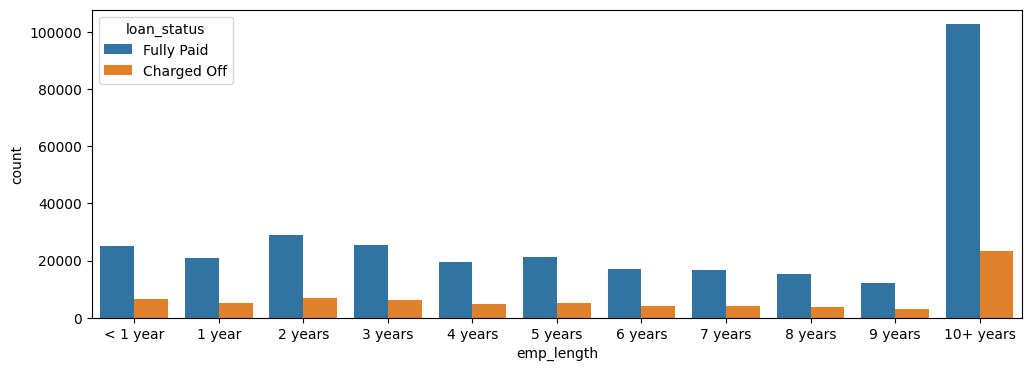

In [34]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=emp_length_order,hue='loan_status')
# this still doesn't really inform us if there is a strong relationship between employment length and being charged off...

In [35]:
emp_co = df[df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']

In [36]:
emp_fp = df[df['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']

In [37]:
emp_len = emp_co/emp_fp

In [38]:
emp_len

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

<Axes: xlabel='emp_length'>

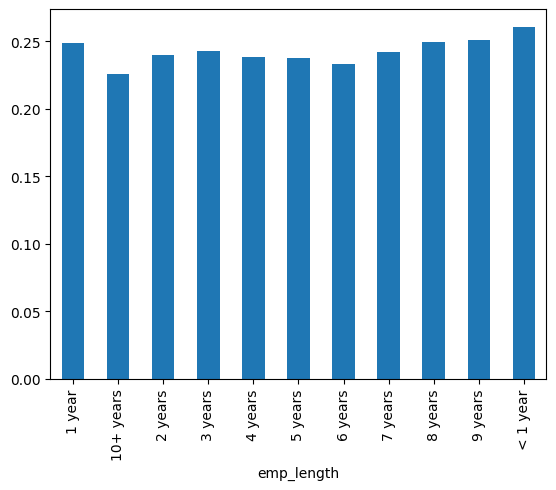

In [39]:
emp_len.plot(kind='bar')
# charge off rates are extremely similar across all employment lengths, so we can drop off this information.

In [40]:
df = df.drop('emp_length',axis=1)
# drop information.

In [41]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [42]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [43]:
df = df.drop('title',axis=1)
# the title column is simply a string subcategory/description of the purpose column, so we can drop it.

In [44]:
feat_info('mort_acc')
# this column has 37795 missing values.

Number of mortgage accounts.


In [45]:
df['mort_acc'].value_counts()

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

**TASK: There are many ways we could deal with this missing data. We could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns, or you could even bin the columns into categories and then set NaN as its own category. There is no 100% correct approach! Let's review the other columsn to see which most highly correlates to mort_acc**

In [46]:
print("Correlation with the mort_acc column")
df_corr.corr()['mort_acc'].sort_values()
# check if there is some high correlation between 'mort_acc' and other information.

Correlation with the mort_acc column


int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [47]:
# 'total_acc' feature correlates with the 'mort_acc'
# we can group the dataframe by the 'total_acc' and calculate the mean value for the 'mort_acc' per 'total_acc' entry:

In [48]:
df_corr.groupby('total_acc').mean()['mort_acc']
# mean of 'mort_acc' column per 'total_acc'.

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [49]:
total_acc_avg = df_corr.groupby('total_acc').mean()['mort_acc']

In [50]:
def fill_mort_acc(total_acc,mort_acc):
    
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [51]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [52]:
df.isnull().sum()
# 'mort_acc' has no longer missing data.
# revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data.

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

**TASK: revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. Go ahead and remove the rows that are missing those values in those columns with dropna().**

In [53]:
df = df.dropna()
# drop remaining missing data.

In [54]:
df.isnull().sum()
# no more missing data.

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [55]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [56]:
df['term'].value_counts()
# keep 36 and 60 as values instead of turning into 0 and 1's, because represents more time to pay the loan.

term
 36 months    301247
 60 months     93972
Name: count, dtype: int64

In [57]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))
# remove "months", leaving just the int number.

In [58]:
df = df.drop('grade',axis=1)

In [59]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)
# convert the subgrade into dummy variables.

In [60]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)
# drop old 'sub_grade' and concatenate new column to original data frame.

In [61]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [62]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)
# convert and concat all these columns.

In [63]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: count, dtype: int64

In [64]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')
#replace 'none' and 'any' with 'other' to reduce value conts.
dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)
#convert 'home_ownership' to dummy.

In [65]:
df.select_dtypes(['object']).columns
#remaining object columns

Index(['issue_d', 'loan_status', 'earliest_cr_line', 'address'], dtype='object')

In [66]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])
# for 'address', get only de zip code (last 5 numbers).

In [67]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)
# drop 'address' and insert the new 'zip_code' column.

In [68]:
df = df.drop('issue_d',axis=1)
# this would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, so we can drop this feature.

In [69]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [70]:
df['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object

In [71]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)
# take and replace column with only the year.

In [72]:
df.select_dtypes(['object']).columns
df = df.drop('loan_status',axis=1)
#now our df has no missing values or object type columns.

In [73]:
from sklearn.model_selection import train_test_split

In [75]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values
# separate 'X' and 'y' and apply test split.

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [77]:
from sklearn.preprocessing import MinMaxScaler

In [78]:
scaler = MinMaxScaler()
# normalize data.

In [79]:
X_train = scaler.fit_transform(X_train)

In [80]:
X_test = scaler.transform(X_test)

In [81]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [82]:
X_train.shape
# 78 columns

(316175, 78)

In [83]:
model = Sequential()

# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [84]:
model.fit(x=X_train,y=y_train,epochs=25,batch_size=256,validation_data=(X_test,y_test))

Epoch 1/25
1236/1236 [==============================] - 9s 7ms/step - loss: 0.2997 - val_loss: 0.2624
Epoch 2/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2654 - val_loss: 0.2619
Epoch 3/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2632 - val_loss: 0.2600
Epoch 4/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2622 - val_loss: 0.2609
Epoch 5/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2615 - val_loss: 0.2595
Epoch 6/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2612 - val_loss: 0.2595
Epoch 7/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2605 - val_loss: 0.2596
Epoch 8/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2598 - val_loss: 0.2594
Epoch 9/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2598 - val_loss: 0.2595
Epoch 10/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.259

In [85]:
losses = pd.DataFrame(model.history.history)
#loses history by epochs.

<Axes: >

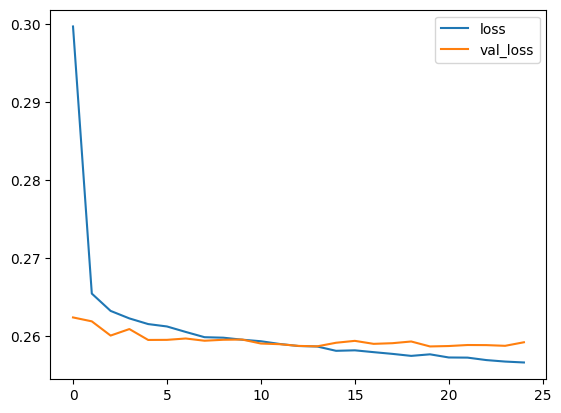

In [86]:
losses[['loss','val_loss']].plot()

In [87]:
from sklearn.metrics import classification_report,confusion_matrix

In [88]:
predictions = np.round(model.predict(X_test))

2471/2471 [==============================] - 3s 1ms/step


In [89]:
print(classification_report(y_test,predictions))
# 89% average accuracy in our model.

              precision    recall  f1-score   support

           0       0.95      0.45      0.61     15488
           1       0.88      0.99      0.93     63556

    accuracy                           0.89     79044
   macro avg       0.92      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [91]:
confusion_matrix(y_test,predictions)

array([[ 7034,  8454],
       [  357, 63199]], dtype=int64)

In [98]:
df.loan_repaid.info()

<class 'pandas.core.series.Series'>
Index: 395219 entries, 0 to 396029
Series name: loan_repaid
Non-Null Count   Dtype
--------------   -----
395219 non-null  int64
dtypes: int64(1)
memory usage: 6.0 MB


In [99]:
df.loan_repaid.sum()/395219

0.8038479931379817

In [ ]:
# if we choose randomly, we would get an 50% accuracy model.
# if we predict 'fully paid' for all entries, we would get an 80% accuracy model.
# with machine learning we got an significant better performance overall (near 90%).